In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\rosem\Downloads\Paper_works\CSVs\Feature_engg_Paper2.csv")
df = df[df['Region'].isin(['CAL','TEX'])]
df

,Date,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,Nuclear_Gen,Hydro_Gen,...,Rolling_Mean_24H,Rolling_Mean_3H_Emission,Rolling_Mean_24H_Emission,Total_Gen,Renewable_Pct,Fossil_Pct,Renewable_Demand,Fossil_Demand,Demand_diff1,Demand_diff24
0,2018-07-01 17:00:00,12.5,28976.042,21138.304,-6528.677,28386.220,8.764,7725.951,2261.073,3089.741,...,42604.509,27096.582,17297.042,17521.203,42.950,44.145,1244530.613,1279144.078,89.458,172.875
1,2018-07-01 18:00:00,12.5,29065.500,21217.885,-6554.521,28486.010,8.792,7761.917,2261.062,3110.594,...,41847.195,8244.812,17052.778,17577.073,42.927,44.209,1247693.394,1284966.639,89.458,172.875
2,2018-07-01 19:00:00,12.5,29154.958,21297.467,-6580.365,28585.800,8.819,7797.882,2261.052,3131.446,...,45629.697,24266.186,19327.269,17632.943,42.904,44.273,1250856.313,1290788.823,89.458,172.875
3,2018-07-01 20:00:00,12.5,29244.417,21377.049,-6606.208,28685.590,8.847,7833.847,2261.042,3152.299,...,48609.446,6436.826,20904.933,17688.812,42.881,44.337,1254019.366,1296610.635,89.458,172.875
4,2018-07-01 21:00:00,12.5,29333.875,21456.630,-6632.052,28785.380,8.875,7869.812,2261.031,3173.151,...,49142.567,6326.084,21205.564,17744.682,42.858,44.400,1257182.553,1302432.078,89.458,172.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525055,2023-06-29 20:00:00,12.5,64967.778,65025.979,58.042,65732.083,8989.486,27552.910,4647.181,32.896,...,49409.849,30361.664,19267.173,46077.069,10.607,79.307,689127.079,5152407.218,-65.642,-1360.549
525056,2023-06-29 21:00:00,12.5,64902.135,64963.474,61.177,65699.302,8993.729,27593.401,4647.292,33.224,...,46137.266,13730.128,18243.586,46106.208,10.566,79.354,685784.748,5150245.412,-65.642,-1414.266
525057,2023-06-29 22:00:00,12.5,64836.493,64900.969,64.312,65666.521,8997.972,27633.892,4647.403,33.552,...,45454.091,12961.713,16905.630,46135.347,10.526,79.401,682451.108,5148073.607,-65.642,-1467.983
525058,2023-06-29 23:00:00,12.5,64770.851,64838.464,67.448,65633.740,9002.215,27674.384,4647.514,33.880,...,39779.804,15939.369,14414.641,46164.486,10.485,79.448,679126.143,5145891.821,-65.642,-1521.700


C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


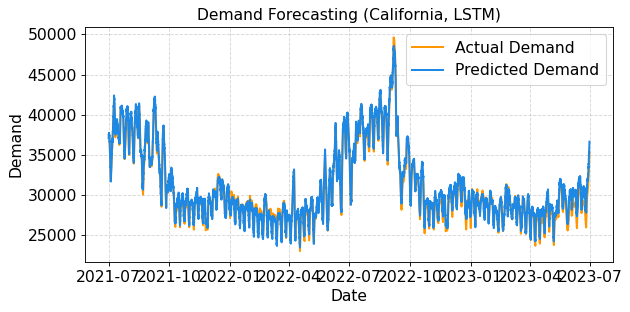

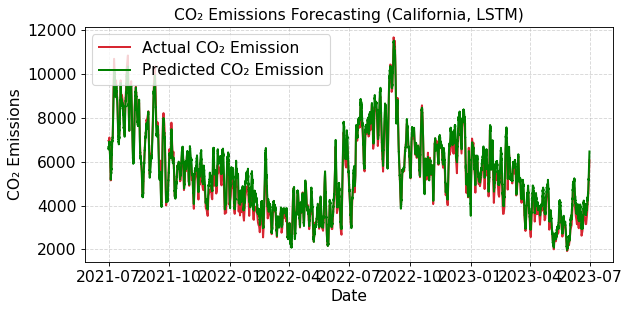

C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


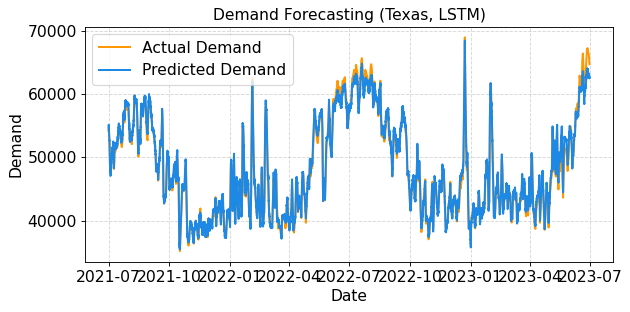

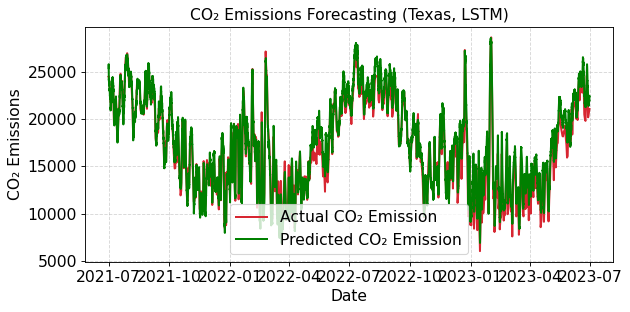

  Region  Epoch  MAE_Demand  RMSE_Demand  MAPE_Demand(%)     MAE_CO2  \
0    CAL      2  461.707167   579.860030        1.541335  258.126810   
1    TEX      2  563.235610   745.354384        1.139459  836.605905   

      RMSE_CO2  MAPE_CO2(%)  
0   310.627380     5.457081  
1  1039.019167     5.495398  


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-6))) * 100

feature_cols = [
    'Hour', 'Month', 'DayOfWeek', 'Is_Weekend', 'DayOfYear', 'WeekOfYear',
    'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Demand_Prev_Hour', 'Demand_Yesterday_Same_Hour', 'Demand_Last_Week_Same_Hour',
    'Emission_Prev_Hour', 'Emission_Yesterday_Same_Hour', 'Emission_Last_Week_Same_Hour',
    'Rolling_Mean_3H', 'Rolling_Mean_24H', 'Rolling_Mean_3H_Emission', 'Rolling_Mean_24H_Emission',
    'Total_Gen', 'Renewable_Pct', 'Fossil_Pct', 'Renewable_Demand', 'Fossil_Demand', 'Demand_diff1', 'Demand_diff24'
]
target_cols = ['Demand', 'CO2_Total_Emissions']

lookback = 30
split_ratio = 0.6
epochs_list = [2]

results = []

for region_code in ['CAL', 'TEX']:
    region_df = df[df['Region'] == region_code].copy()
    region_df['Date'] = pd.to_datetime(region_df['Date'])
    region_df = region_df.sort_values('Date').reset_index(drop=True)

    features = region_df[feature_cols]
    targets = region_df[target_cols]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(features)
    y_scaled = scaler_y.fit_transform(targets)

    def create_sequences(X, y, lookback=30):
        Xs, ys = [], []
        for i in range(lookback, len(X)):
            Xs.append(X[i-lookback:i])
            ys.append(y[i])
        return np.array(Xs), np.array(ys)

    X_seq, y_seq = create_sequences(X_scaled, y_scaled)
    split = int(split_ratio * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    for epoch in epochs_list:
        model = Sequential([
            LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(2)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=epoch, batch_size=64, verbose=0)
        y_pred_scaled = model.predict(X_test)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = scaler_y.inverse_transform(y_test)

        test_dates = region_df['Date'].iloc[split+lookback:].reset_index(drop=True)


        mae_demand = mean_absolute_error(y_true[:, 0], y_pred[:, 0])
        rmse_demand = np.sqrt(mean_squared_error(y_true[:, 0], y_pred[:, 0]))
        mape_demand = mean_absolute_percentage_error(y_true[:, 0], y_pred[:, 0])
        mae_co2 = mean_absolute_error(y_true[:, 1], y_pred[:, 1])
        rmse_co2 = np.sqrt(mean_squared_error(y_true[:, 1], y_pred[:, 1]))
        mape_co2 = mean_absolute_percentage_error(y_true[:, 1], y_pred[:, 1])

        results.append({
            'Region': region_code,
            'Epoch': epoch,
            'MAE_Demand': mae_demand,
            'RMSE_Demand': rmse_demand,
            'MAPE_Demand(%)': mape_demand,
            'MAE_CO2': mae_co2,
            'RMSE_CO2': rmse_co2,
            'MAPE_CO2(%)': mape_co2
        })

        region_name = 'California' if region_code == 'CAL' else 'Texas'
        fontsize = 14

       # Plot Demand
        plt.figure(figsize=(8, 4), dpi=80)
        plt.plot(test_dates, y_true[:, 0], label='Actual Demand', color='#FF9800', linewidth=1.8)  # Orange
        plt.plot(test_dates, y_pred[:, 0], label='Predicted Demand', color='#1E88E5', linewidth=1.8)  # Blue
        plt.xlabel('Date', fontsize=fontsize)
        plt.title(f'Demand Forecasting ({region_name}, LSTM)', fontsize=fontsize)
        plt.ylabel('Demand', fontsize=fontsize)
        plt.legend(fontsize=fontsize)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tick_params(axis='both', labelsize=fontsize)
        plt.tight_layout()
        plt.show()

        # Plot CO2 Emissions
        plt.figure(figsize=(8, 4), dpi=80)
        plt.plot(test_dates, y_true[:, 1], label='Actual CO₂ Emission', color='#D72631', linewidth=1.8)
        plt.plot(test_dates, y_pred[:, 1], label='Predicted CO₂ Emission', color='green', linewidth=1.8)
        plt.xlabel('Date', fontsize=fontsize)
        plt.title(f'CO₂ Emissions Forecasting ({region_name}, LSTM)', fontsize=fontsize)
        #plt.xlabel('Date', fontsize=fontsize)
        plt.ylabel('CO₂ Emissions', fontsize=fontsize)
        plt.legend(fontsize=fontsize)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tick_params(axis='both', labelsize=fontsize)
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


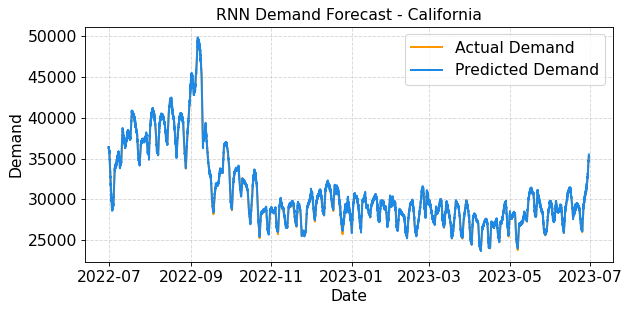

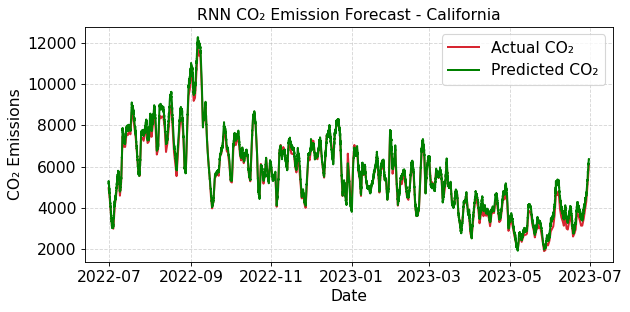

C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


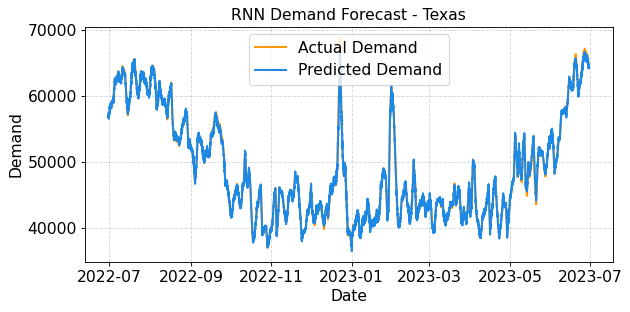

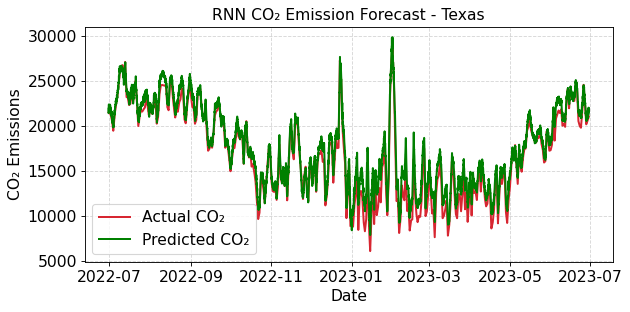


RNN Forecasting Results:
       Region  MAE_Demand  RMSE_Demand  MAPE_Demand  MAE_CO2  RMSE_CO2  \
0  California      146.80       191.17         0.49   200.68    244.94   
1       Texas      320.59       438.57         0.65   922.32   1135.29   

   MAPE_CO2  
0      4.08  
1      6.74  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Utility functions
def create_sequences(X, y, lookback=30):
    Xs, ys = [], []
    for i in range(lookback, len(X)):
        Xs.append(X[i-lookback:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-6))) * 100


feature_cols = [
    'Hour', 'Month', 'DayOfWeek', 'Is_Weekend', 'DayOfYear', 'WeekOfYear',
    'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Demand_Prev_Hour', 'Demand_Yesterday_Same_Hour', 'Demand_Last_Week_Same_Hour',
    'Emission_Prev_Hour', 'Emission_Yesterday_Same_Hour', 'Emission_Last_Week_Same_Hour',
    'Rolling_Mean_3H', 'Rolling_Mean_24H', 'Rolling_Mean_3H_Emission', 'Rolling_Mean_24H_Emission',
    'Total_Gen', 'Renewable_Pct', 'Fossil_Pct', 'Renewable_Demand', 'Fossil_Demand', 'Demand_diff1', 'Demand_diff24'
]
target_cols = ['Demand', 'CO2_Total_Emissions']

lookback = 30
split_ratio = 0.8
epochs_list = [10]

results = []

for region_code in ['CAL', 'TEX']:
    region_name = 'California' if region_code == 'CAL' else 'Texas'
    region_df = df[df['Region'] == region_code].copy()
    region_df['Date'] = pd.to_datetime(region_df['Date'])
    region_df = region_df.sort_values('Date').reset_index(drop=True)

    features = region_df[feature_cols]
    targets = region_df[target_cols]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(features)
    y_scaled = scaler_y.fit_transform(targets)

    X_seq, y_seq = create_sequences(X_scaled, y_scaled)
    split = int(split_ratio * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    model = Sequential([
        SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)
    test_dates = region_df['Date'].iloc[split+lookback:].reset_index(drop=True)

    # Metrics
    result = {
        'Region': region_name,
        'MAE_Demand': mae(y_true[:, 0], y_pred[:, 0]),
        'RMSE_Demand': rmse(y_true[:, 0], y_pred[:, 0]),
        'MAPE_Demand': mape(y_true[:, 0], y_pred[:, 0]),
        'MAE_CO2': mae(y_true[:, 1], y_pred[:, 1]),
        'RMSE_CO2': rmse(y_true[:, 1], y_pred[:, 1]),
        'MAPE_CO2': mape(y_true[:, 1], y_pred[:, 1])
    }
    results.append(result)

    rnn_results_df = pd.DataFrame({
        'Date': test_dates,
        'Region': region_name,
        'Model': 'RNN',
        'Actual_Demand': y_true[:, 0],
        'Predicted_Demand': y_pred[:, 0],
        'Actual_CO2': y_true[:, 1],
        'Predicted_CO2': y_pred[:, 1]
    })

    fontsize = 14

    # Demand Plot
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(rnn_results_df['Date'], rnn_results_df['Actual_Demand'],
             label='Actual Demand', color='#FF9800', linewidth=1.8)  # Orange
    plt.plot(rnn_results_df['Date'], rnn_results_df['Predicted_Demand'],
             label='Predicted Demand', color='#1E88E5', linewidth=1.8)  # Blue
    plt.title(f'RNN Demand Forecast - {region_name}', fontsize=fontsize)
    plt.xlabel('Date', fontsize=fontsize)
    plt.ylabel('Demand', fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()

    # CO₂ Emissions Plot
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(rnn_results_df['Date'], rnn_results_df['Actual_CO2'],
             label='Actual CO₂', color='#D72631', linewidth=1.8)  # Red
    plt.plot(rnn_results_df['Date'], rnn_results_df['Predicted_CO2'],
             label='Predicted CO₂', color='green', linewidth=1.8)  # Green
    plt.title(f'RNN CO₂ Emission Forecast - {region_name}', fontsize=fontsize)
    plt.xlabel('Date', fontsize=fontsize)
    plt.ylabel('CO₂ Emissions', fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()


# Results table
results_df = pd.DataFrame(results)
print('\nRNN Forecasting Results:')
print(results_df.round(2))



📊 Processing region: California
California - Demand RMSE: 2176.00, MAE: 1524.48, MAPE: 4.79%
California - CO₂ RMSE: 1004.75, MAE: 750.13, MAPE: 13.11%


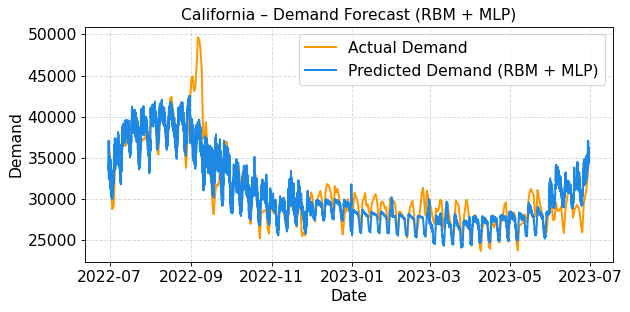

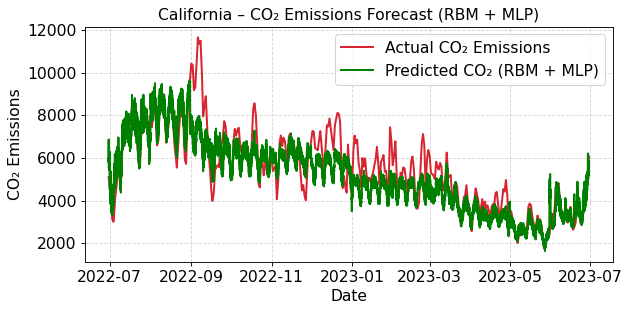


📊 Processing region: Texas
Texas - Demand RMSE: 4248.60, MAE: 3296.09, MAPE: 6.80%
Texas - CO₂ RMSE: 1950.06, MAE: 1479.26, MAPE: 10.26%


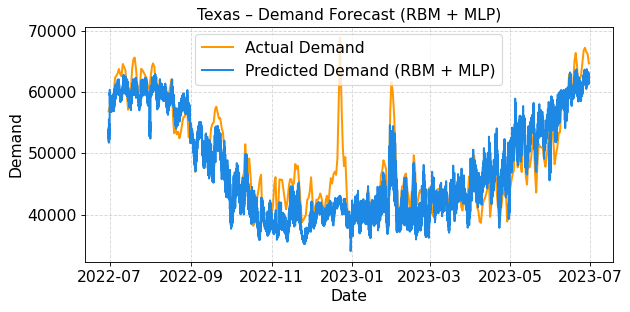

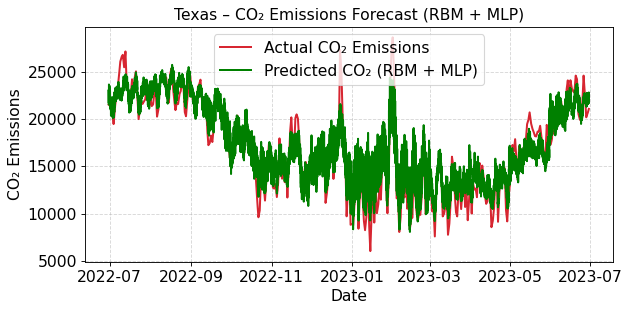

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM, MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

feature_cols = [
    'Hour', 'Month', 'DayOfWeek', 'Is_Weekend', 'DayOfYear', 'WeekOfYear',
    'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Demand_Prev_Hour', 'Demand_Yesterday_Same_Hour', 'Demand_Last_Week_Same_Hour',
    'Emission_Prev_Hour', 'Emission_Yesterday_Same_Hour', 'Emission_Last_Week_Same_Hour',
    'Rolling_Mean_3H', 'Rolling_Mean_24H', 'Rolling_Mean_3H_Emission', 'Rolling_Mean_24H_Emission',
    'Total_Gen', 'Renewable_Pct', 'Fossil_Pct', 'Renewable_Demand', 'Fossil_Demand', 'Demand_diff1', 'Demand_diff24'
]
target_cols = ['Demand', 'CO2_Total_Emissions']
fontsize = 14

def evaluate_forecast(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-6))) * 100
    return rmse, mae, mape

def rbm_forecasting(region_code, display_name):
    print(f"\n📊 Processing region: {display_name}")

    region_df = df[df['Region'] == region_code].copy()
    region_df['Date'] = pd.to_datetime(region_df['Date'])
    region_df = region_df.sort_values('Date').reset_index(drop=True)
    features = region_df[feature_cols]
    targets = region_df[target_cols]
    test_dates = region_df['Date']

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(features)
    y_scaled = scaler_y.fit_transform(targets)

    split = int(0.8 * len(X_scaled))
    X_train, X_test = X_scaled[:split], X_scaled[split:]
    y_train, y_test = y_scaled[:split], y_scaled[split:]
    test_dates = test_dates[split:]

    rbm_nn = Pipeline(steps=[
        ('rbm', BernoulliRBM(n_components=64, learning_rate=0.06, n_iter=10, random_state=42)),
        ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42))
    ])

    rbm_nn.fit(X_train, y_train)

    y_pred_scaled = rbm_nn.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    rmse_demand, mae_demand, mape_demand = evaluate_forecast(y_true[:, 0], y_pred[:, 0])
    rmse_co2, mae_co2, mape_co2 = evaluate_forecast(y_true[:, 1], y_pred[:, 1])

    print(f"{display_name} - Demand RMSE: {rmse_demand:.2f}, MAE: {mae_demand:.2f}, MAPE: {mape_demand:.2f}%")
    print(f"{display_name} - CO₂ RMSE: {rmse_co2:.2f}, MAE: {mae_co2:.2f}, MAPE: {mape_co2:.2f}%")

    # Demand Plot
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 0], label='Actual Demand', color='#FF9800', linewidth=1.8)  # orange
    plt.plot(test_dates, y_pred[:, 0], label='Predicted Demand (RBM + MLP)', color='#1E88E5', linewidth=1.8)  # blue
    plt.title(f"{display_name} – Demand Forecast (RBM + MLP)", fontsize=fontsize)
    plt.xlabel("Date", fontsize=fontsize)
    plt.ylabel("Demand", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()

    # CO₂ Emissions Plot
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 1], label='Actual CO₂ Emissions', color='#D72631', linewidth=1.8)
    plt.plot(test_dates, y_pred[:, 1], label='Predicted CO₂ (RBM + MLP)', color='green', linewidth=1.8)
    plt.title(f"{display_name} – CO₂ Emissions Forecast (RBM + MLP)", fontsize=fontsize)
    plt.xlabel("Date", fontsize=fontsize)
    plt.ylabel("CO₂ Emissions", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()

    return {
        'Region': display_name,
        'Demand': {'RMSE': rmse_demand, 'MAE': mae_demand, 'MAPE': mape_demand},
        'CO2': {'RMSE': rmse_co2, 'MAE': mae_co2, 'MAPE': mape_co2}
    }

# Run for both regions
cal_metrics = rbm_forecasting("CAL", "California")
tex_metrics = rbm_forecasting("TEX", "Texas")


C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


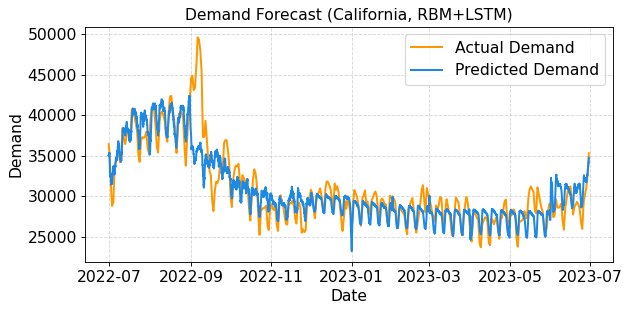

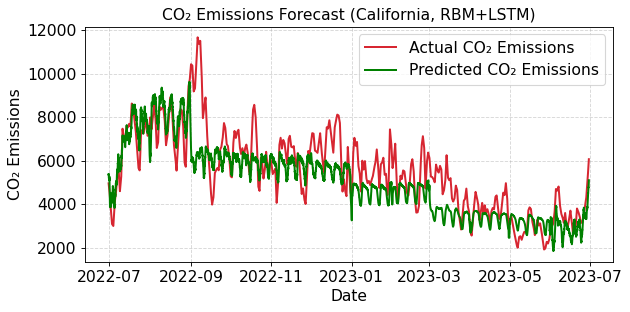

C:\Users\rosem\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


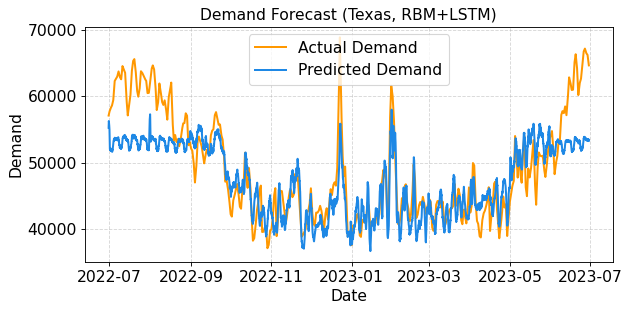

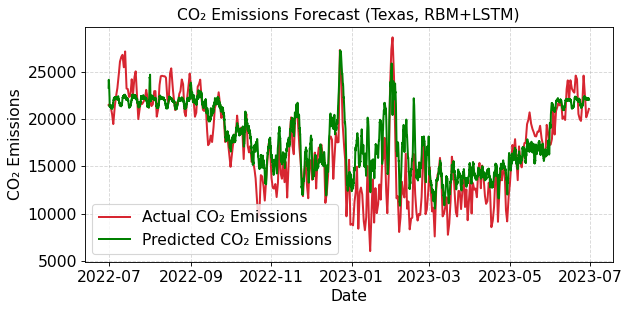

       Region  MAE_Demand  RMSE_Demand  MAPE_Demand(%)  MAE_CO2  RMSE_CO2  \
0  California     1501.03      2282.16            4.66   890.34   1188.09   
1       Texas     3432.46      4614.09            6.52  2028.59   2673.98   

   MAPE_CO2(%)  
0        16.06  
1        15.09  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def mae(y_true, y_pred): return np.mean(np.abs(y_true - y_pred))
def rmse(y_true, y_pred): return np.sqrt(np.mean((y_true - y_pred) ** 2))
def mape(y_true, y_pred): return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-6))) * 100

feature_cols = [
    'Hour', 'Month', 'DayOfWeek', 'Is_Weekend', 'DayOfYear', 'WeekOfYear',
    'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Demand_Prev_Hour', 'Demand_Yesterday_Same_Hour', 'Demand_Last_Week_Same_Hour',
    'Emission_Prev_Hour', 'Emission_Yesterday_Same_Hour', 'Emission_Last_Week_Same_Hour',
    'Rolling_Mean_3H', 'Rolling_Mean_24H', 'Rolling_Mean_3H_Emission', 'Rolling_Mean_24H_Emission',
    'Total_Gen', 'Renewable_Pct', 'Fossil_Pct', 'Renewable_Demand', 'Fossil_Demand', 'Demand_diff1', 'Demand_diff24'
]
target_cols = ['Demand', 'CO2_Total_Emissions']

lookback = 30
split_ratio = 0.8
fontsize = 14

results = []

for region_code, region_name in [('CAL', 'California'), ('TEX', 'Texas')]:
    region_df = df[df['Region'] == region_code].copy()
    region_df['Date'] = pd.to_datetime(region_df['Date'])
    region_df = region_df.sort_values('Date').reset_index(drop=True)
    region_df.set_index('Date', inplace=True)

    features = region_df[feature_cols]
    targets = region_df[target_cols]

    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(features)

    rbm = BernoulliRBM(n_components=20, learning_rate=0.05, n_iter=20, random_state=42)
    X_rbm = rbm.fit_transform(X_scaled)

    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(targets)

    def create_sequences(X, y, lookback=30):
        Xs, ys = [], []
        for i in range(lookback, len(X)):
            Xs.append(X[i-lookback:i])
            ys.append(y[i])
        return np.array(Xs), np.array(ys)

    X_seq, y_seq = create_sequences(X_rbm, y_scaled, lookback=lookback)
    split = int(split_ratio * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    model = Sequential([
        LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(y_train.shape[1])
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    test_dates = region_df.index[split + lookback:]

    # --- Demand Plot ---
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 0], label='Actual Demand', color='#FF9800', linewidth=1.8)
    plt.plot(test_dates, y_pred[:, 0], label='Predicted Demand', color='#1E88E5', linewidth=1.8)
    plt.title(f'Demand Forecast ({region_name}, RBM+LSTM)', fontsize=fontsize)
    plt.xlabel('Date', fontsize=fontsize)
    plt.ylabel('Demand', fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()

    # --- CO₂ Emissions Plot ---
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 1], label='Actual CO₂ Emissions', color='#D72631', linewidth=1.8)
    plt.plot(test_dates, y_pred[:, 1], label='Predicted CO₂ Emissions', color='green', linewidth=1.8)
    plt.title(f'CO₂ Emissions Forecast ({region_name}, RBM+LSTM)', fontsize=fontsize)
    plt.xlabel('Date', fontsize=fontsize)
    plt.ylabel('CO₂ Emissions', fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()
    plt.show()

    results.append({
        'Region': region_name,
        'MAE_Demand': mae(y_true[:, 0], y_pred[:, 0]),
        'RMSE_Demand': rmse(y_true[:, 0], y_pred[:, 0]),
        'MAPE_Demand(%)': mape(y_true[:, 0], y_pred[:, 0]),
        'MAE_CO2': mae(y_true[:, 1], y_pred[:, 1]),
        'RMSE_CO2': rmse(y_true[:, 1], y_pred[:, 1]),
        'MAPE_CO2(%)': mape(y_true[:, 1], y_pred[:, 1])
    })

metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))



Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0116 - val_loss: 0.0018
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 7.2555e-04 - val_loss: 6.7362e-04
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 4.3142e-04 - val_loss: 7.2066e-04
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 3.3030e-04 - val_loss: 4.5681e-04
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 2.8028e-04 - val_loss: 5.0650e-04
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 2.4842e-04 - val_loss: 4.3068e-04
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 2.1237e-04 - val_loss: 3.2844e-04
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 1.7924e-04 - val_loss: 6.0508e-04
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.6106e-04 - val_loss: 3.5744e-04
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.5295e-04 - val_loss: 4.9157e-04
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


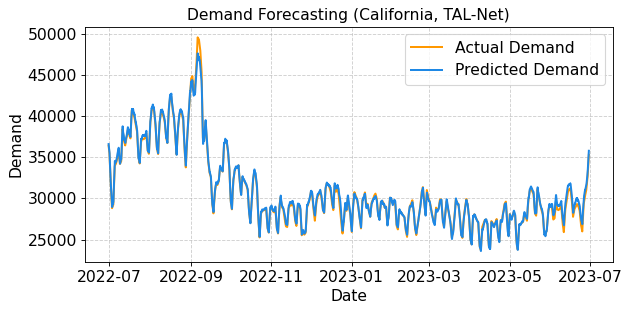

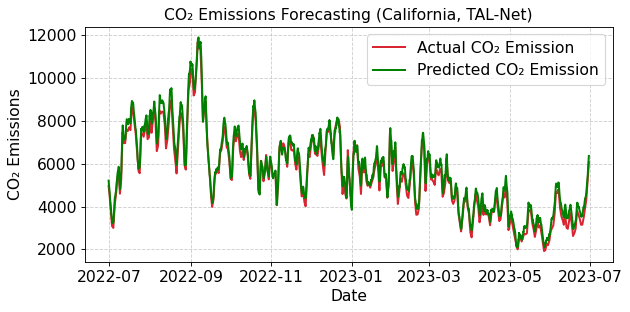

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0093 - val_loss: 0.0018
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 6.6783e-04 - val_loss: 0.0011
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 5.1682e-04 - val_loss: 0.0015
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 4.2110e-04 - val_loss: 6.9572e-04
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 3.9439e-04 - val_loss: 8.8225e-04
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 3.5327e-04 - val_loss: 0.0012
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 3.0886e-04 - val_loss: 9.1899e-04
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 3.1049e-04 - val_loss: 0.0010
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 2.8258e-04 - val_loss: 0.0011
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


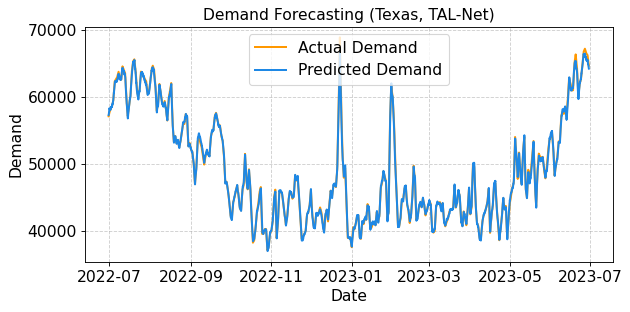

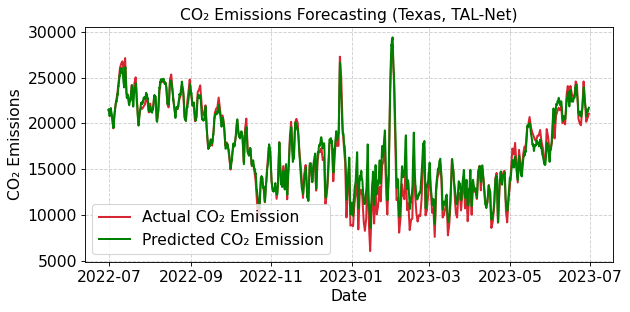

       Region  MAE_Demand  RMSE_Demand  MAPE_Demand(%)     MAE_CO2  \
0  California  230.367098   341.811471        0.730972  255.491664   
1       Texas  198.701732   281.653929        0.396983  757.804540   

      RMSE_CO2  MAPE_CO2(%)  
0   291.907912     5.206086  
1  1030.940467     5.672567  


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, LSTM, Dense, Input
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --- Custom Attention Layer ---
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)
    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# --- Metrics ---
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + 1e-8))) * 100

feature_cols = [
    'Hour', 'Month', 'DayOfWeek', 'Is_Weekend', 'DayOfYear', 'WeekOfYear',
    'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Demand_Prev_Hour', 'Demand_Yesterday_Same_Hour', 'Demand_Last_Week_Same_Hour',
    'Emission_Prev_Hour', 'Emission_Yesterday_Same_Hour', 'Emission_Last_Week_Same_Hour',
    'Rolling_Mean_3H', 'Rolling_Mean_24H', 'Rolling_Mean_3H_Emission', 'Rolling_Mean_24H_Emission',
    'Total_Gen', 'Renewable_Pct', 'Fossil_Pct', 'Renewable_Demand', 'Fossil_Demand', 'Demand_diff1', 'Demand_diff24'
]
target_cols = ['Demand', 'CO2_Total_Emissions']

lookback = 30
split_ratio = 0.8
results = []

for region_code, region_name in [('CAL', 'California'), ('TEX', 'Texas')]:
    region_df = df[df['Region'] == region_code].copy()
    region_df['Date'] = pd.to_datetime(region_df['Date'])
    region_df = region_df.sort_values('Date').reset_index(drop=True)
    region_df.set_index('Date', inplace=True)

    features = region_df[feature_cols].values
    targets = region_df[target_cols].values

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(features)
    y_scaled = scaler_y.fit_transform(targets)

    def create_sequences(X, y, lookback=30):
        Xs, ys = [], []
        for i in range(lookback, len(X)):
            Xs.append(X[i-lookback:i])
            ys.append(y[i])
        return np.array(Xs), np.array(ys)
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, lookback=lookback)
    split = int(split_ratio * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    # --- LSTM + Attention Model ---
    model = Sequential([
        Input(shape=(lookback, X_train.shape[2])),
        LSTM(64, return_sequences=True),
        Attention(),
        Dense(32, activation='relu'),
        Dense(y_train.shape[1])  # 2 outputs: Demand and CO2
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test, y_test))

    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)
    test_dates = region_df.index[split + lookback:]

    # --- Metrics ---
    results.append({
        'Region': region_name,
        'MAE_Demand': mae(y_true[:, 0], y_pred[:, 0]),
        'RMSE_Demand': rmse(y_true[:, 0], y_pred[:, 0]),
        'MAPE_Demand(%)': mape(y_true[:, 0], y_pred[:, 0]),
        'MAE_CO2': mae(y_true[:, 1], y_pred[:, 1]),
        'RMSE_CO2': rmse(y_true[:, 1], y_pred[:, 1]),
        'MAPE_CO2(%)': mape(y_true[:, 1], y_pred[:, 1])
    })

    # --- Plot Demand ---
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 0], label='Actual Demand', color='#FF9800', linewidth=1.8)  # orange
    plt.plot(test_dates, y_pred[:, 0], label='Predicted Demand', color='#1E88E5', linewidth=1.8)  # blue
    plt.title(f'Demand Forecasting ({region_name}, TAL-Net)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Demand', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', labelsize=14)
    plt.tight_layout()
    plt.show()
    
    # --- Plot CO2 Emissions ---
    plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(test_dates, y_true[:, 1], label='Actual CO₂ Emission', color='#D72631', linewidth=1.8)
    plt.plot(test_dates, y_pred[:, 1], label='Predicted CO₂ Emission', color='green', linewidth=1.8)
    plt.title(f'CO₂ Emissions Forecasting ({region_name}, TAL-Net)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('CO₂ Emissions', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tick_params(axis='both', labelsize=14)
    plt.tight_layout()
    plt.show()


results_df = pd.DataFrame(results)
print(results_df)
